In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

math = pd.read_csv('C:/Users/Софулькан/Downloads/stud_math.csv')

# Загрузили датафрейм, начинаем начинать
## Функции для графиков и статистики убираем наверх

In [128]:
def get_boxplot(column):  # функция, рисующая Boxplot'ы для номинативных данных
    fig, ax = plt.subplots(figsize=(10, 4))
    sns.boxplot(x=column, y='score',
                data=math[['score', column]],
                ax=ax)
    ax.set_title('Boxplot for ' + column)
    plt.show()


def get_stat_dif(column):  # функция, проводящая корреляционный тест Стьюдента
    cols = math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(math.loc[math.loc[:, column] == comb[0], 'score'], math.loc[math.loc[:, column] == comb[1], 'score'], nan_policy='omit').pvalue \
                <= 0.1/len(combinations_all):  # порог поднимаем до 0.1 - мы тут хотим детей обучить всё-таки
            print('Найдены статистически значимые различия для колонки', column)
            break

# Чистим датафрейм:

In [164]:
# Проанализировав math.describe(), пришли к выводу, что колонки Fedu и famrel содержат ошибочные данные
# В колонке absences явно есть выбросы. Вычислили "максимум" по формуле Q3+1.5*IQR, равный 20

math.info()

math = math.loc[math.Fedu <= 4]  # убираем ошибки по образованию отцов
math = math.loc[math.famrel >= 1]  # убираем ошибки по семейным отношениям
math = math.loc[math.absences < 21]  # убираем выбросы по пропущенным занятиям

# math.query('score = 0') показывает в колонке score 30 значений с нулевой оценкой.
# При анализе этой выборки выяснилось, что у всех учеников с нулевой оценкой в колонке score был ноль в колонке absences.
# Можно сделать вывод, что это, скорее всего, ошибка в наборе данных, а не реальная оценка.
# Исключим учеников с нулевой оценкой из финального набора.

math = math.loc[math.score > 0]  # убираем учеников с 0 оценкой

# Самый важный параметр - оценка, удаляем записи с пустой оценкой

math = math.dropna(subset=['score'])

# Считаю, что рандомно заполнять отсутствующие значения не следует,
# там нет прямой зависимости между столбцами. В функции теста Стьюдента есть параметр,
# который игнорирует NaN

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               283 non-null    object 
 1   sex                  283 non-null    object 
 2   age                  283 non-null    int64  
 3   address              273 non-null    object 
 4   famsize              266 non-null    object 
 5   Pstatus              252 non-null    object 
 6   Medu                 281 non-null    float64
 7   Fedu                 283 non-null    float64
 8   Mjob                 269 non-null    object 
 9   Fjob                 259 non-null    object 
 10  reason               270 non-null    object 
 11  guardian             257 non-null    object 
 12  traveltime           262 non-null    float64
 13  studytime            278 non-null    float64
 14  failures             268 non-null    float64
 15  schoolsup            274 non-null    obj

# Графики

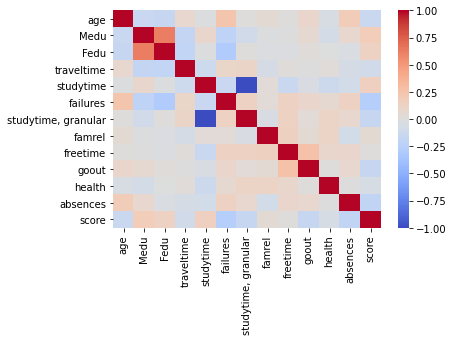

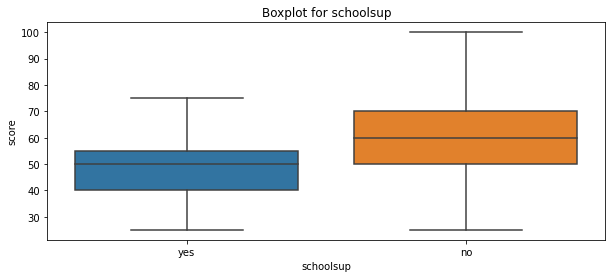

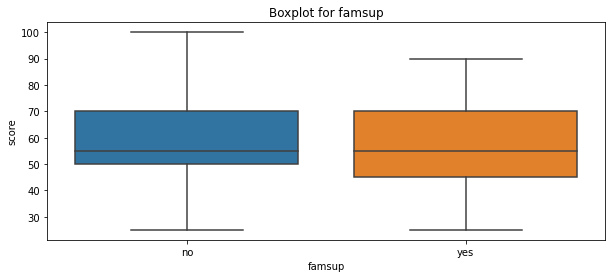

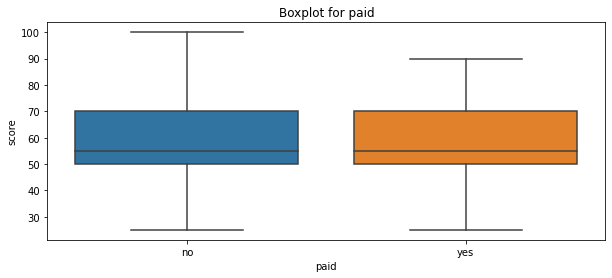

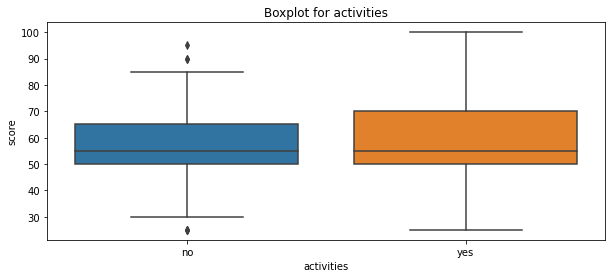

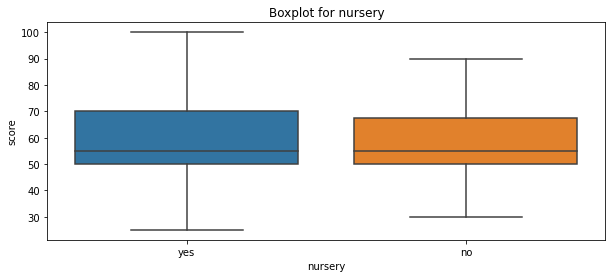

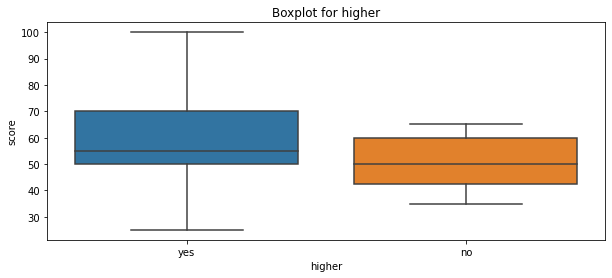

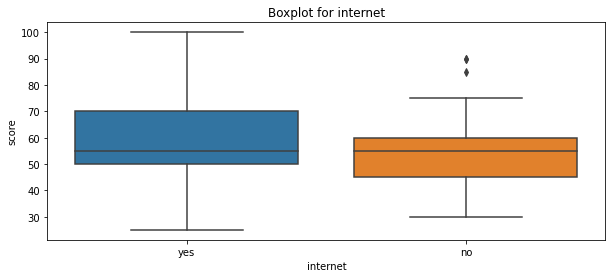

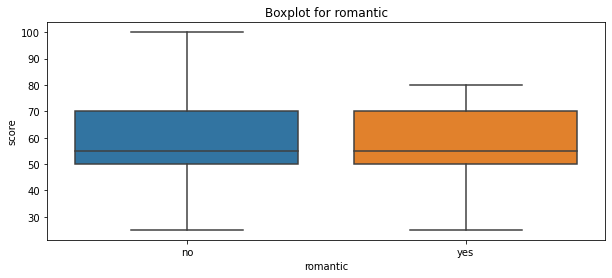

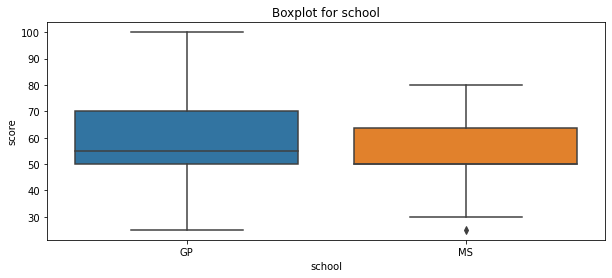

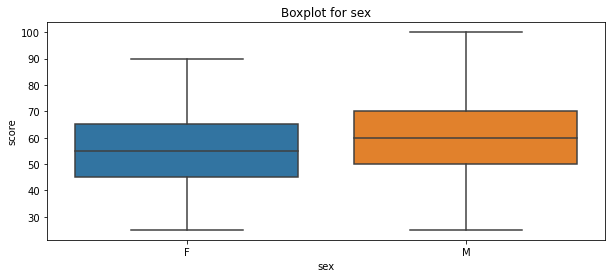

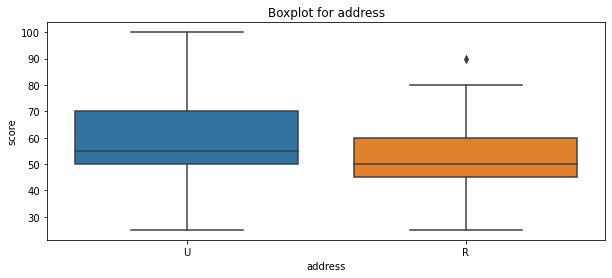

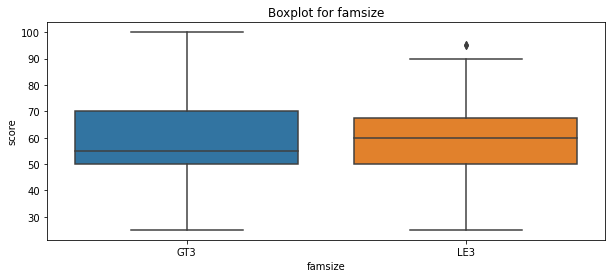

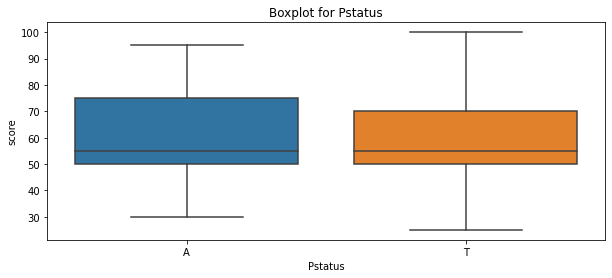

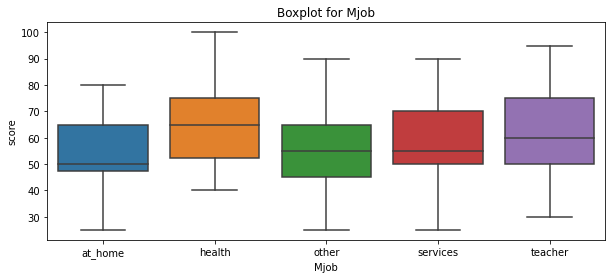

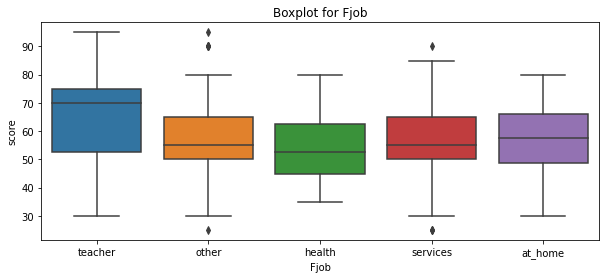

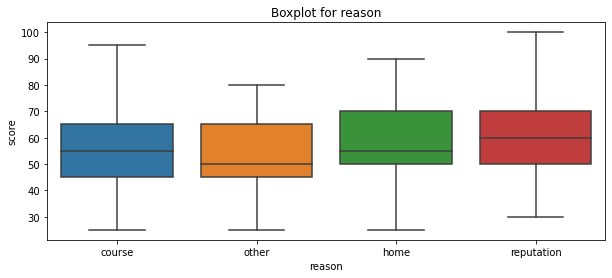

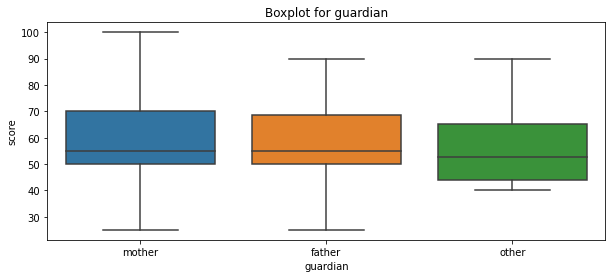

In [152]:
correl = math.corr()

# график корреляционного анализа количественных данных
sns.heatmap(data=correl, cmap='coolwarm')

for col in ['schoolsup', 'famsup', 'paid', 'activities', 'nursery',  # графики для клонок с вариантами ответа yes/no
            'higher', 'internet', 'romantic']:
    get_boxplot(col)

for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob',  # графики для остальных параметрических данных
            'Fjob', 'reason', 'guardian']:
    get_boxplot(col)

# Корреляционный анализ
## Из графиков кажется, будто многие параметры имеют значение
### Проверим, так ли это

In [167]:
for col in ['schoolsup', 'famsup', 'paid', 'activities', 'nursery',
            'higher', 'internet', 'romantic']:
    get_stat_dif(col)

for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob',
            'Fjob', 'reason', 'guardian']:
    get_stat_dif(col)


correl.iloc[:, -1]

Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob


age                   -0.140389
Medu                   0.186408
Fedu                   0.136031
traveltime            -0.089759
studytime              0.160618
failures              -0.258997
studytime, granular   -0.160618
famrel                 0.048474
freetime               0.015149
goout                 -0.160888
health                -0.049131
absences              -0.194584
score                  1.000000
Name: score, dtype: float64

# Выводы:

1. В исходных данных присутствуют пустые значения, по некоторым колонкам до 12%
2. В исходных данных найдены явные ошибки при заполнении в колонках Fedu и famrel, в колонке absences были найдены ошибки и выбросы.
3. В колонке score были обнаружены 30 нулевых значений. При сравнении выяснилось, что, скорее всего, это ошибочные данные. Они были исключены из анализа.
4. Корреляционный анализ выявил достаточно низкие коэффициенты корреляции количественных данных, однако рекомендуем обратить внимание на параметр failures (коэф.корр. -0.26). Из-за методологии записи данных, показатели свыше 3 случаев были неотличимы от 0 случаев. Возможно, этот параметр будет существенным при полноценных данных о внешкольных неудачах.
5. В результате анализа номинативных данных найдены значимые различия для колонок schoolsup, sex, address, Mjob.


In [168]:
data_for_model = math.loc[:, [
    'sex', 'address', 'Mjob', 'schoolsup', 'failures']]
data_for_model.head()

,sex,address,Mjob,schoolsup,failures
0,F,U,at_home,yes,0.0
1,F,U,at_home,no,0.0
2,F,U,at_home,yes,3.0
3,F,U,health,no,0.0
4,F,U,other,no,0.0
